# E-commerce Sales Data Analysis

**Objective:**  
To analyze sales and profit performance across categories and regions using Python.

**Tools Used:**  
Python, Pandas, NumPy, Matplotlib


In [45]:
import pandas as pd
import matplotlib.pyplot as plt

## 1. Data Loading

In this step, the dataset is loaded using Pandas to begin exploratory analysis.


In [2]:
from google.colab import files
uploaded = files.upload()

Saving ecommerce_sales_data.csv to ecommerce_sales_data.csv


In [19]:
df = pd.read_csv('ecommerce_sales_data.csv')

## 2. Data Overview

This section helps understand the structure of the dataset, including number of rows,
columns, data types, and presence of missing values.


In [57]:
print(df.head(2),"\n")
print(df.info(), "\n")
print(df.shape)

  Order Date Product Name     Category Region  Quantity  Sales  Profit
0 2024-12-31      Printer       Office  North         4   3640  348.93
1 2022-11-27        Mouse  Accessories   East         7   1197  106.53 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    3500 non-null   datetime64[ns]
 1   Product Name  3500 non-null   object        
 2   Category      3500 non-null   object        
 3   Region        3500 non-null   object        
 4   Quantity      3500 non-null   int64         
 5   Sales         3500 non-null   int64         
 6   Profit        3500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 191.5+ KB
None 

(3500, 7)


### Observations:
- The dataset contains 3500 rows and 7 columns.
- Order Date is currently in object format.
- Numerical columns include Sales, Profit, and Quantity.


## 3. Date Conversion

The Order Date column is converted to datetime format to enable time-based analysis
such as monthly and yearly trends.


In [21]:
df['Order Date']=pd.to_datetime(df['Order Date'])

In [62]:
df.dtypes

,0
Order Date,datetime64[ns]
Product Name,object
Category,object
Region,object
Quantity,int64
Sales,int64
Profit,float64


Order Date converted to datetime for time-based analysis.

## 4. Data Quality Checks

This step checks for missing values and duplicate records to ensure data accuracy.


In [26]:
df.isnull().sum()

,0
Order Date,0
Product Name,0
Category,0
Region,0
Quantity,0
Sales,0
Profit,0


In [29]:
df.duplicated().sum()

np.int64(0)

In [63]:
df.drop_duplicates(inplace=True)


### Cleaning Decisions:
- No missing values found / Missing values handled.
- No Duplicate records found


## 5. Business Analysis

This section answers key business questions using aggregated data.


### Q1. What is the total sales, profit, and quantity sold?


In [38]:
df[['Sales', 'Profit', 'Quantity']].sum()

,0
Sales,10667881.00
Profit,1844665.21
Quantity,17261.00


**Insight:**  
Total sales: 10667881.00

Total profit: 1844665.21

Total Quantity Sold: 17261.00

## 6. Visualization

A bar chart is used to compare total sales across different product categories.


# Sales By Category

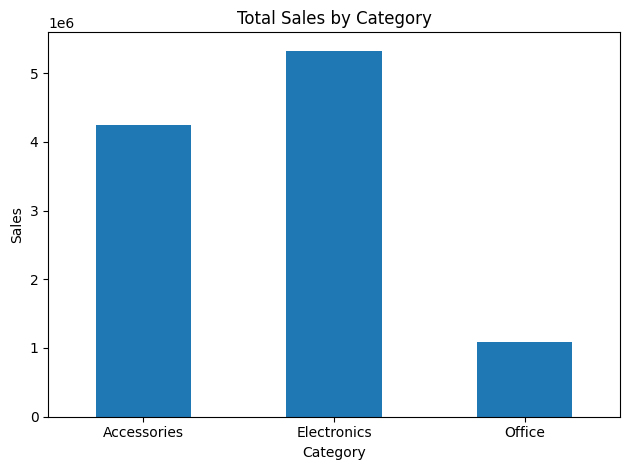

In [81]:
df.groupby('Category')['Sales'].sum().plot(kind='bar')
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Insight:**  
The Electronics category contributes the highest sales, indicating strong customer demand.


# Profit by Region

Text(0.5, 1.0, 'Profit By Region')

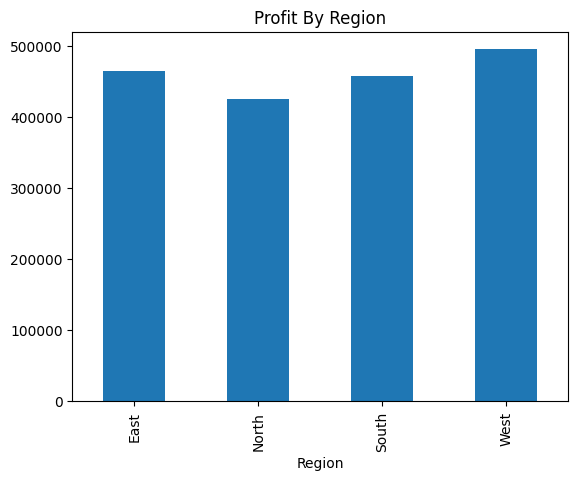

In [74]:
df.groupby('Region')['Profit'].sum().plot(kind='bar')
plt.title('Profit By Region')

Region **WEST** contributes the highest profit.

## Day 1 Summary

- Loaded and explored the dataset
- Converted Order Date for time analysis
- Analyzed sales and profit by category and region
- Created initial visualization with insights
